# IMPORTING THE REQUIRED LYBRARIES

In [153]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np

In [154]:
data=pd.read_csv(r'C:\Users\Lenovo\Desktop\CVIP\imdb_movies.csv')
data.shape
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10178 entries, 0 to 10177
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   names       10178 non-null  object 
 1   date_x      10178 non-null  object 
 2   score       10178 non-null  float64
 3   genre       10093 non-null  object 
 4   overview    10178 non-null  object 
 5   crew        10122 non-null  object 
 6   orig_title  10178 non-null  object 
 7   status      10178 non-null  object 
 8   orig_lang   10178 non-null  object 
 9   budget_x    10178 non-null  float64
 10  revenue     10178 non-null  float64
 11  country     10178 non-null  object 
dtypes: float64(3), object(9)
memory usage: 954.3+ KB


# CLEANSING IMDB DATASET

In [155]:
#find thecount of null values
data.isnull().sum()
#our data only needs to be cleaned for 2 columns

names          0
date_x         0
score          0
genre         85
overview       0
crew          56
orig_title     0
status         0
orig_lang      0
budget_x       0
revenue        0
country        0
dtype: int64

In [156]:
#the precentage of the data missing for rows
round(data.isnull().sum(axis=1).sort_values(ascending=False)/len(data)*100,3)

5755     0.02
5637     0.02
3906     0.02
10076    0.02
6458     0.02
         ... 
3399     0.00
3400     0.00
3401     0.00
3402     0.00
10177    0.00
Length: 10178, dtype: float64

In [157]:
#dropping the unnecceasary columns
'''data.drop(name_of_the_column)'''
#we do not need to remove any column as all teh column has some value fo analysing

'data.drop(name_of_the_column)'

In [158]:
#we will remove the missing values
data=data[data['genre'].notnull()]
data=data[data['crew'].notnull()]

In [159]:
#rechecking if we have any missing data
round(data.isnull().sum().sort_values(ascending=False)/len(data)*100,5)

names         0.0
date_x        0.0
score         0.0
genre         0.0
overview      0.0
crew          0.0
orig_title    0.0
status        0.0
orig_lang     0.0
budget_x      0.0
revenue       0.0
country       0.0
dtype: float64

In [160]:
#checking if there is any rows which has more than five missing values
(data.isnull().sum(axis=1).sort_values(ascending=False)>5).sum()

0

In [161]:
#use this for plotiing a histogram
data.groupby('score').score.count().sort_values(ascending=False)

score
68.0    469
65.0    441
69.0    435
63.0    432
66.0    421
       ... 
91.0      1
92.0      1
93.0      1
98.0      1
18.0      1
Name: score, Length: 78, dtype: int64

In [162]:
data.groupby('orig_lang').orig_lang.count().sort_values(ascending=False)

orig_lang
 English                                7381
 Japanese                                675
 Spanish, Castilian                      388
 Korean                                  384
 French                                  282
 Chinese                                 144
 Italian                                 142
 Cantonese                               141
 German                                   89
 Russian                                  65
 Tagalog                                  42
 Portuguese                               35
 Thai                                     33
 Norwegian                                29
 Hindi                                    26
 Polish                                   26
 Danish                                   23
 Swedish                                  22
 Dutch, Flemish                           21
 Turkish                                  21
 Indonesian                               11
 Finnish                                   6


In [163]:
data.orig_lang.describe()

count        10052
unique          53
top        English
freq          7381
Name: orig_lang, dtype: object

In [164]:
data['orig_lang'].isnull().sum()
#we do not have any null values in the language column so we do not need to do any fillings
#same thing can be said for the rest of the columns 

0

# ANALYSING IMDB DATASET

In [165]:
#data analysing
#code for unit conversion 
data['budget_x']=data['budget_x']/1000000
data['revenue']=data['revenue']/1000000
data['score']=data['score']/10

In [166]:
#finding movies with highest profit
#creating profit column
data['profit']=data['revenue']-data['budget_x']

In [167]:
#sorting the data
data.sort_values(by='profit',ascending=False)

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country,profit
68,Avatar,12/17/2009,7.6,"Action, Adventure, Fantasy, Science Fiction","In the 22nd century, a paraplegic Marine is di...","Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar,Released,English,237.0,2923.706026,AU,2686.706026
230,Avengers: Endgame,04/24/2019,8.3,"Adventure, Science Fiction, Action",After the devastating events of Avengers: Infi...,"Robert Downey Jr., Tony Stark / Iron Man, Chri...",Avengers: Endgame,Released,English,400.0,2794.731755,AU,2394.731755
309,Titanic,12/18/1997,7.9,"Drama, Romance",101-year-old Rose DeWitt Bukater tells the sto...,"Leonardo DiCaprio, Jack Dawson, Kate Winslet, ...",Titanic,Released,English,200.0,2222.985568,AU,2022.985568
6670,Titanic,04/11/1953,6.6,"Drama, Romance","Unhappily married, Julia Sturges decides to go...","Clifton Webb, Richard Ward Sturges, Barbara St...",Titanic,Released,English,200.0,2222.985568,US,2022.985568
4483,Louis Tomlinson: All of Those Voices,03/22/2023,9.1,"Documentary, Music",Ditching the typical glossy sheen of celebrity...,"Louis Tomlinson, Self, Oliver Wright, Louis’ P...",Louis Tomlinson: All of Those Voices,Released,English,178.8,2081.794006,GB,1902.994006
...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,The Gray Man,07/14/2022,7.0,"Action, Thriller",When a shadowy CIA agent uncovers damning agen...,"Ryan Gosling, Six, Chris Evans, Lloyd Hansen, ...",The Gray Man,Released,English,200.0,0.451178,AU,-199.548822
414,Guardians of the Galaxy Volume 3,05/04/2023,0.0,"Science Fiction, Adventure, Comedy","Peter Quill, still reeling from the loss of Ga...","Chris Pratt, Peter Quill / Star-Lord, Zoe Sald...",Guardians of the Galaxy Volume 3,Post Production,English,250.0,1.240262,AU,-248.759738
4471,Mission: Impossible - Dead Reckoning Part One,07/14/2023,0.0,"Action, Adventure, Thriller",The seventh installment of the Mission: Imposs...,"Tom Cruise, Ethan Hunt, Rebecca Ferguson, Ilsa...",Mission: Impossible - Dead Reckoning Part One,Post Production,English,290.0,1.240262,US,-288.759738
1546,Indiana Jones and the Dial of Destiny,06/30/2023,0.0,"Adventure, Action","Finding himself in a new era, approaching reti...","Harrison Ford, Indiana Jones, Phoebe Waller-Br...",Indiana Jones and the Dial of Destiny,Post Production,English,294.7,1.240262,US,-293.459738


In [168]:
#top 10 earning movie
top10=data.sort_values(by='profit',ascending=False).head(10)

In [169]:
#dropping the duplicate values
data.drop_duplicates(keep='first',inplace=True)

In [170]:
#top 250 movies based on the scores 
data[data['score']>7.5].sort_values(by='score',ascending=False).head(250)

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country,profit
6433,"Furin, hentai, monmon chômon",10/25/2019,10.0,Drama,"Minoru is dead. However, he was conscious for ...","Tomoka Takase, Maya Iizuka, Riona Suzushiro, S...",不倫、変態、悶々弔問,Released,Japanese,201.000000,1569.323844,JP,1368.323844
443,El asistente,03/01/2023,10.0,Comedy,We don't have an overview translated in Englis...,"Rodrigo Noya, Miguel, Luis Cao, Jimmy, Florenc...",El asistente,Released,"Spanish, Castilian",201.000000,1569.323844,AR,1368.323844
934,Female Boss Hooker,08/31/2020,10.0,"Drama, Romance",Ji-cheol is a job seeker who only plays and ea...,"Ye Seul, , Lee Sul-ah-I, , Min Do-yoon, , Jo Y...",여사장 후리꾼,Released,Korean,201.000000,1569.323844,KR,1368.323844
277,Orgasm Lecture 2,02/20/2020,10.0,Drama,"Yuner, Liu Ren, and Zhou Xian are college girl...","Min Do-yoon, , Park Soo-bin-III, , Hong Sae-he...",오르가즘 특강 2,Released,Korean,201.000000,1569.323844,KR,1368.323844
10046,Simulant,06/02/2023,10.0,"Science Fiction, Thriller",Faye attempts to replace her newly deceased hu...,"Robbie Amell, Evan, Jordana Brewster, Faye, Si...",Hello Stranger,Released,English,201.000000,1569.323844,US,1368.323844
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2864,Reservoir Dogs,07/30/1993,8.1,"Crime, Thriller",A botched robbery indicates a police informant...,"Harvey Keitel, Mr. White / Larry Dimmick, Tim ...",Reservoir Dogs,Released,English,1.200000,2.990680,AU,1.790680
6133,Ran,09/01/1986,8.1,"Action, Drama, History","With Ran, legendary director Akira Kurosawa re...","Tatsuya Nakadai, Lord Hidetora Ichimonji, Akir...",乱,Released,Japanese,11.500005,11.859533,AU,0.359528
6191,Ayla: The Daughter of War,06/21/2018,8.1,"Drama, War, History","In 1950, amidst the ravages of the Korean War,...","İsmail Hacıoğlu, Süleyman Dirliği, Kim Seol, A...",Ayla,Released,Turkish,4.172781,60.006602,KR,55.833821
2976,Memories of Murder,05/02/2003,8.1,"Crime, Drama, Thriller",1986 Gyunggi Province. The body of a young wom...,"Song Kang-ho, Detective Park Doo-man, Kim Sang...",살인의 추억,Released,Korean,2.800000,26.000000,KR,23.200000


In [171]:
#adding serial numbers to teh given dataset
data['s.no'] = range(1, len(data) + 1)
data['s.no'] = pd.Series(range(1, len(data) + 1), index=data.index)
data.head( )

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country,profit,s.no
0,Creed III,03/02/2023,7.3,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75.0,271.616668,AU,196.616668,1
1,Avatar: The Way of Water,12/15/2022,7.8,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460.0,2316.794914,AU,1856.794914,2
2,The Super Mario Bros. Movie,04/05/2023,7.6,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100.0,724.459031,AU,624.459031,3
3,Mummies,01/05/2023,7.0,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,Released,"Spanish, Castilian",12.3,34.200000,AU,21.900000,4
4,Supercell,03/17/2023,6.1,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,English,77.0,340.941959,US,263.941959,5


# EDA ON IMDB DATASET

In [172]:
#eda on imdb dataset
from pandas_profiling import ProfileReport
profile = ProfileReport(data)
profile.to_widgets()
profile = ProfileReport(data, explorative=True, minimal=True, title="Your Data Report")
profile.to_file("data_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# CORRELATION ON IMDB DATASET

In [173]:
#corelation of the data between single values
corr1=data['score'].corr(data['budget_x'])
corr2=data['score'].corr(data['revenue'])
corr3=data['score'].corr(data['profit'])
corr4=data['budget_x'].corr(data['revenue'])
corr5=data['budget_x'].corr(data['profit'])
corr6=data['revenue'].corr(data['profit'])

In [174]:
print('the correlation between the scores and the budget is \n',corr1)
print('the correlation between the scores and the revenue is \n',corr2)
print('the correlation between the scores and the profit is \n',corr3)
print('the correlation between the budget and the revenue is \n',corr4)
print('the correlation between the budget and the profit is \n',corr5)
print('the correlation between the revenue and the profit is \n',corr1)

the correlation between the scores and the budget is 
 -0.21437428672756229
the correlation between the scores and the revenue is 
 0.09092918696676572
the correlation between the scores and the profit is 
 0.1544586295715517
the correlation between the budget and the revenue is 
 0.6827657476017076
the correlation between the budget and the profit is 
 0.5473815417779312
the correlation between the revenue and the profit is 
 -0.21437428672756229


In [175]:
#teh correlation between multiple columns
sel_cols=['score','budget_x','revenue','profit']
corr_matrix=data[sel_cols].corr()
print('the correlation matri for numeric columns is: \n')
corr_matrix

the correlation matri for numeric columns is: 



,score,budget_x,revenue,profit
score,1.000000,-0.214374,0.090929,0.154459
budget_x,-0.214374,1.000000,0.682766,0.547382
revenue,0.090929,0.682766,1.000000,0.985191
profit,0.154459,0.547382,0.985191,1.000000


# DATA VISUALIZATION ON IMDB DATASET

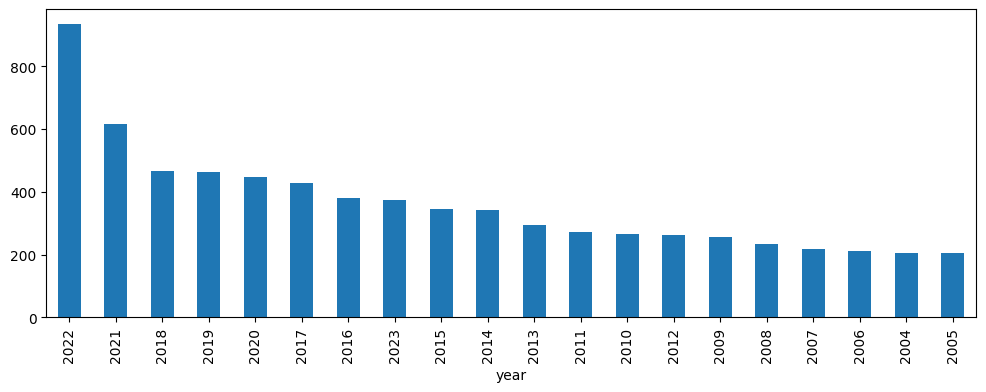

In [176]:
'''Drawing bar graph based on top 10 years of most number of movies releases.'''
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
%matplotlib inline
data['date_x']=pd.to_datetime(data['date_x'])
data['year']=data['date_x'].dt.year
data['year'].value_counts().head(20).plot.bar(figsize=(12,4))
plt.show()

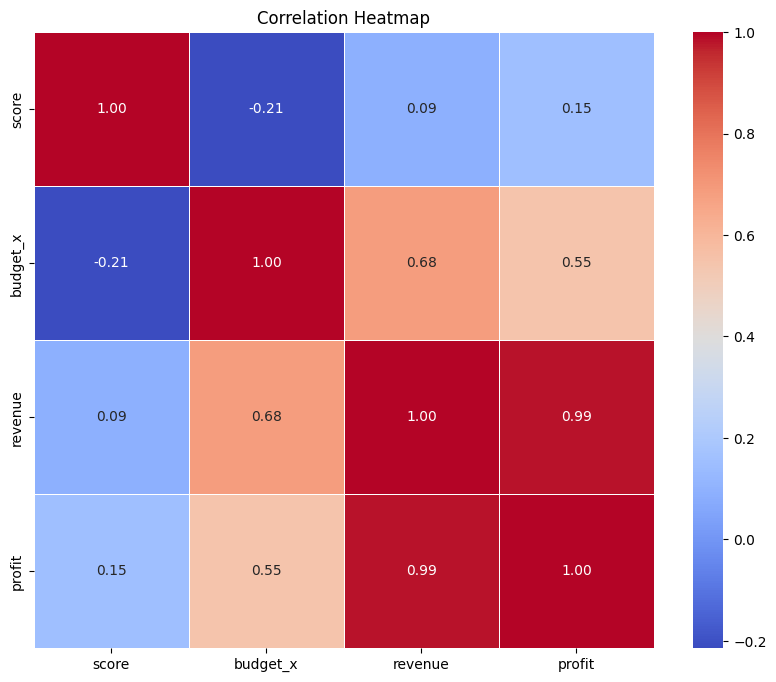

In [177]:
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.savefig('correlation_heatmap.png')
plt.show()

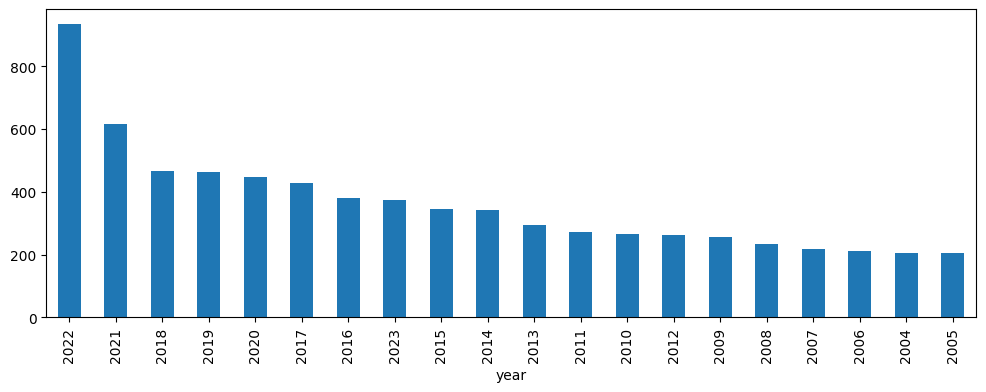

In [178]:
'''drawing the bar graph based on the top 20 years of most numbers of movies release'''
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
%matplotlib inline
data['date_x']=pd.to_datetime(data['date_x'])
data['year']=data['date_x'].dt.year
data['year'].value_counts().head(20).plot.bar(figsize=(12,4))
plt.show()

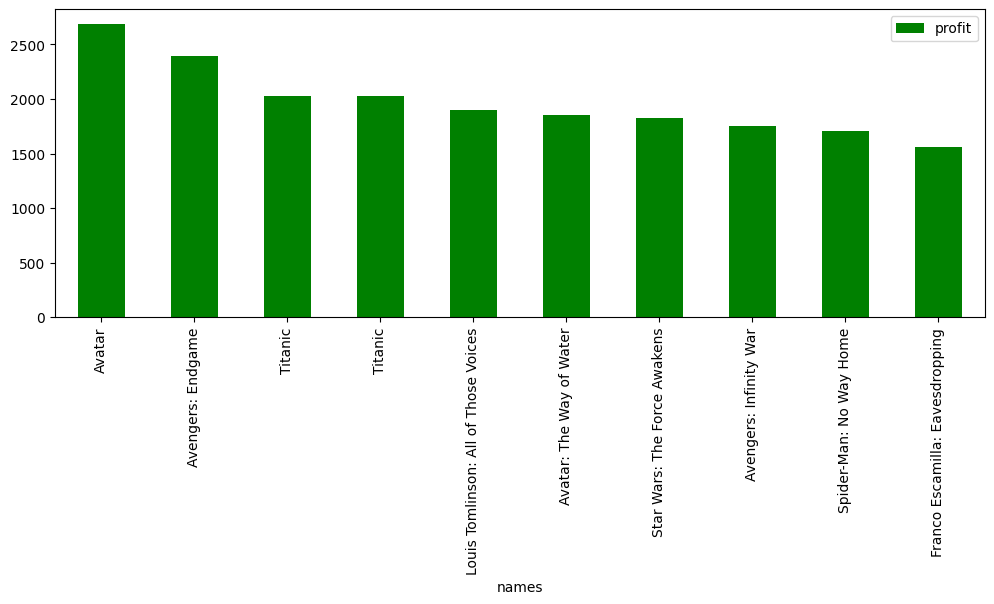

In [179]:
'''top 10 highest profit movies'''
top10=data.nlargest(10,'profit')
top10.index=top10.names
top10[['names','profit']].plot.bar(figsize=(12,4), color='green')
plt.show()

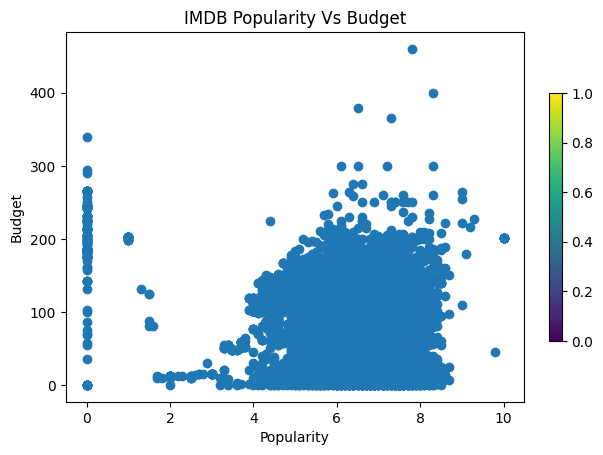

In [180]:
'''popularity vs budget'''
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(data['score'],data['budget_x'])
plt.title("IMDB Popularity Vs Budget")
plt.xlabel("Popularity")
plt.ylabel("Budget")
plt.colorbar(fraction=.025)
plt.show()

In [ ]:
#number of movies released in each genre
data_split = data['genre'].str.split(',', expand=True).stack()
unique_genres = data_split.unique()
data['genre'] = data['genre'].str.strip()
genre_counts = data_split.value_counts()
genre_counts.plot.bar(figsize=(12,6))
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.title('Number of Movies in Each Genre')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()